# comparison NMR plotting

##### Matplotlib and Graph setup

**Warning** 
* The command `matplotlib.use('nbagg')` does work only if this notebook is within a brower.
 
* The following command must be executed in a terminal window at the prompt:
    
>    $ cd '/the/path/where/your/notebooks/are/saved'
    
>    $ ipython notebook

which should automatically open a browser. 
 
* Then the present notebook can be open from the file browser.
 
* If you get an error here because *lcsdefault* does not exist, run the `lcsstyle.ipynb` first.
 
* You can define your own style, using the technique described in this `lcsstyle.ipynb` notebook 

In [1]:
import matplotlib
matplotlib.use('nbagg') # this allows having inline graph, which can be modified (i.e., zooming)

from matplotlib import pyplot as pl

#print pl.style.available # list all available styles 
matplotlib.rcdefaults()
pl.style.use('lcsdefault')

/Users/aurelievicente/workspace/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##### Imports

In [2]:
import os

from matplotlib import pyplot as pl

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


import numpy as np
import nmrglue as ng
import pandas as pd

##### Local imports

In [3]:
from lcslib.nmr.bruker import read_pdata
from lcslib.nmr.units import scale

##### i/o directory

In [4]:
DATADIR = os.path.expanduser(os.path.join('~','Documents','aurelie','data')) 
FIGDIR = 'figures'

### import data

In [5]:
# Xenon
user = 'eddy'
name1 = '151202'

expno1 = 10 
procno = 1

path1 = os.path.join(DATADIR,user,'nmr',name1, str(expno1), 'pdata',str(procno))

dic1, data1 = read_pdata(path1, all_components=True) # read specs and proc

#r,i = data
r1, i1 = data1

# make pd.DataFrame
#x = scale(dic, unit='ppm', axis=-1)
#d1r = pd.Series(r.astype(np.float64, copy=False), index=x)

x1 = scale(dic1, unit='ppm', axis=-1)
d1r1 = pd.Series(r1.astype(np.float64, copy=False), index=x1)

##### Plot

<IPython.core.display.Javascript object>


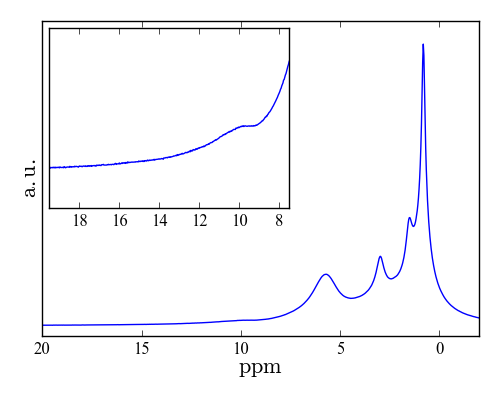

In [37]:
#f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = pl.subplots(nrows=3, ncols=2)

fig = pl.figure(figsize=(5,4)) 
fig.subplots_adjust( hspace = 0.001, wspace=0.001)
#fig.subplots_adjust(hspace = 0.001, wspace=0.001)

ax1 = fig.add_subplot(111)
ax1.plot(x1, d1r1)
# draw a default vline at x=1 that spans the yrange

#pl.axvline(x=6.8, ymin=-1.5e8, ymax =2.8e8, color='k', linestyle='dotted')
#pl.axvline(x=20, ymin=-1.5e8, ymax =2.8e8, color='k', linestyle='dotted')

axins = inset_axes(ax1,
                   width="55%",  # width = 30% of parent_bbox
                   height=1.8,  # height : 1 inch
                   loc=2)

axins.plot(x1, d1r1)
axins.set_xlim(19.5,7.5)
axins.set_ylim(-5e6,3e7)

pl.yticks([],visible=False)

#figure 280K

ax1.set_yticks([])
ax1.set_xlim(20,-2)
ax1.set_ylim(-1.5e7,5e8)
ax1.set_xlabel(r'$\mathrm{ppm}$', fontsize=16, labelpad=1)
ax1.set_ylabel(r'$\mathrm{a.u.}$', fontsize=16, labelpad=1)
#ax1.tick_params(labelsize=16) 
ax1.text(140,2e6,'A', fontsize=14, color= 'k', fontweight='bold', fontstyle='italic')
#ax1.text(79,4.5e6,'B', fontsize=12, color= 'k', fontweight='bold', fontstyle='italic')
#ax1.text(10,2.5e6,'C', fontsize=12, color= 'k', fontweight='bold', fontstyle='italic')
#ax1.text(190,0.6e6,'x100', fontsize=12, color= 'k', fontweight='bold', fontstyle='italic')
#ax1.text(230,1.2e6,'FER-9', fontsize=12, color='g',  fontweight='bold', fontstyle='italic')
#ax1.text(230,0.2e6,'FER-46', fontsize=12, color='r',  fontweight='bold', fontstyle='italic')


pl.savefig(os.path.join(FIGDIR,'1h_BEA-TPA.png'))
#--------
pl.show()